# Show counts and percentages for bar plots

In [1]:
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    after_stat,
    stage,
    geom_bar,
    geom_text,
    geom_label,
    position_dodge2,
    facet_wrap
)
from plotnine.data import mtcars


We can plot a bar graph and easily show the counts for each bar

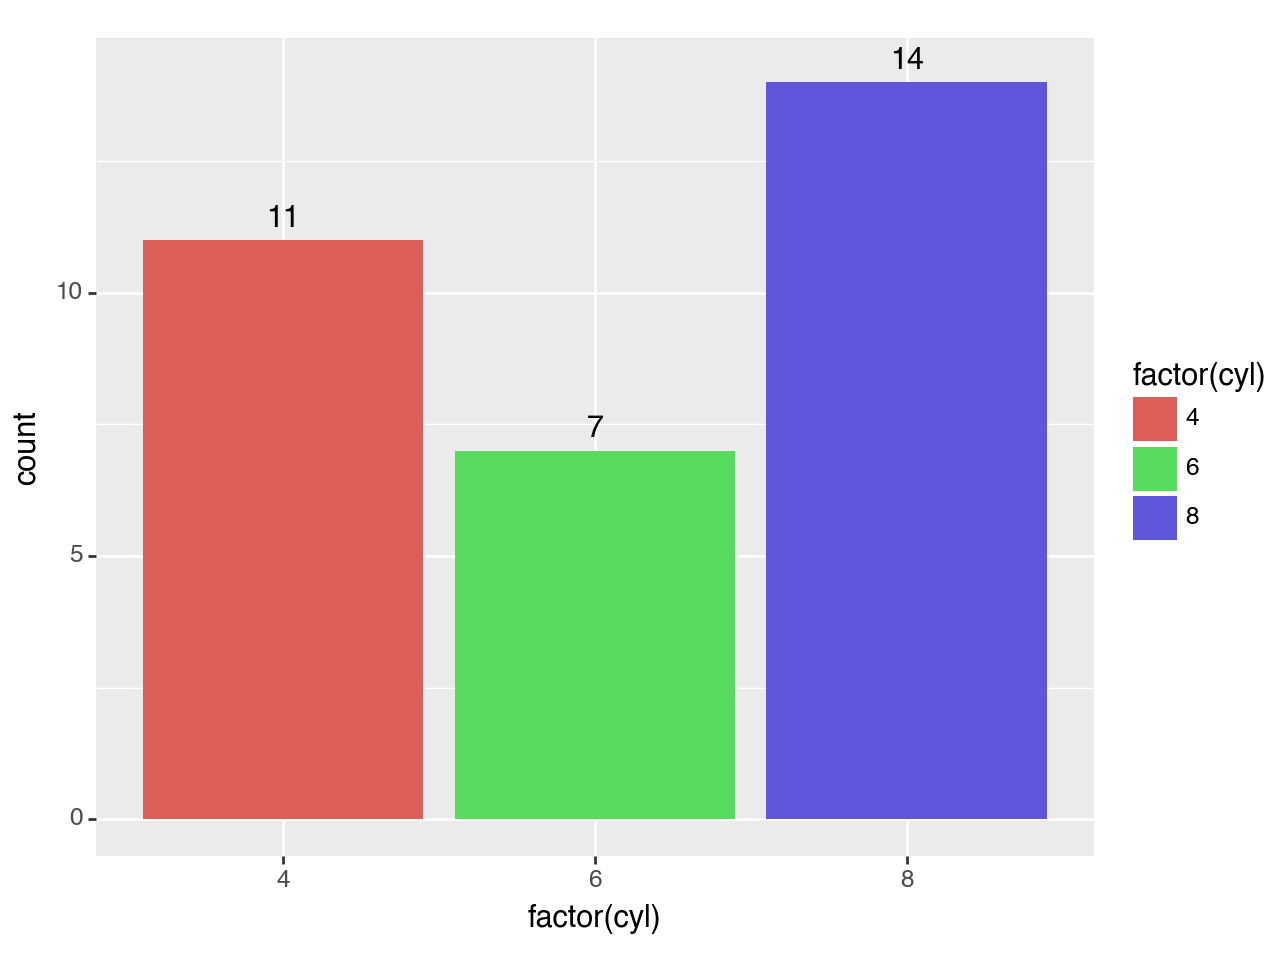

<Figure Size: (640 x 480)>

In [2]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('count')),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
)

`stat_count` also calculates proportions (as `prop`) and a proportion can be converted to a percentage.

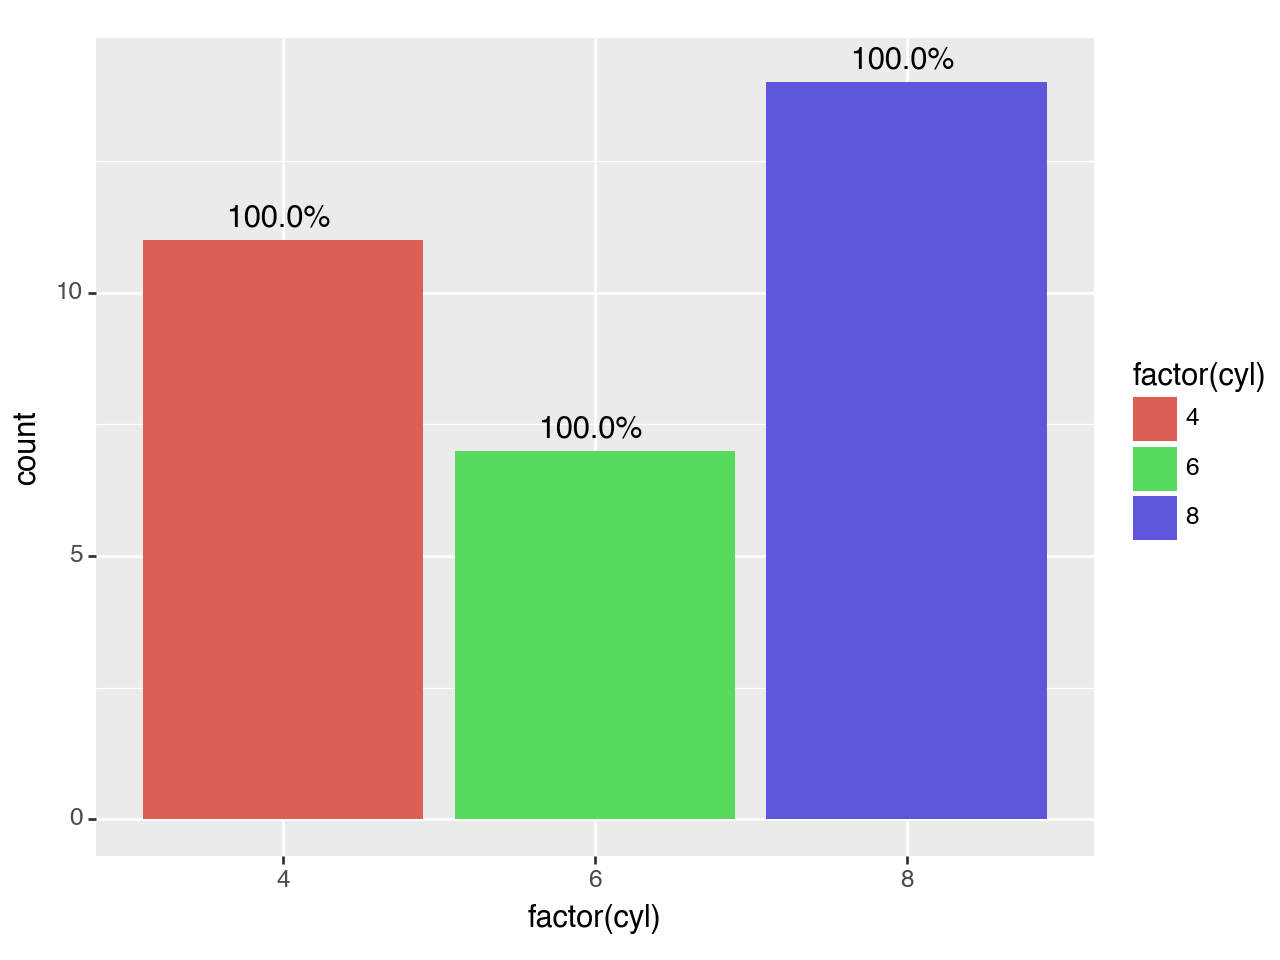

<Figure Size: (640 x 480)>

In [3]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('prop*100')),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}% '
 )
)

These are clearly wrong percentages. The system puts each bar in a separate group.
We need to tell it to put all bars in the panel in single group, so that the percentage
are what we expect.

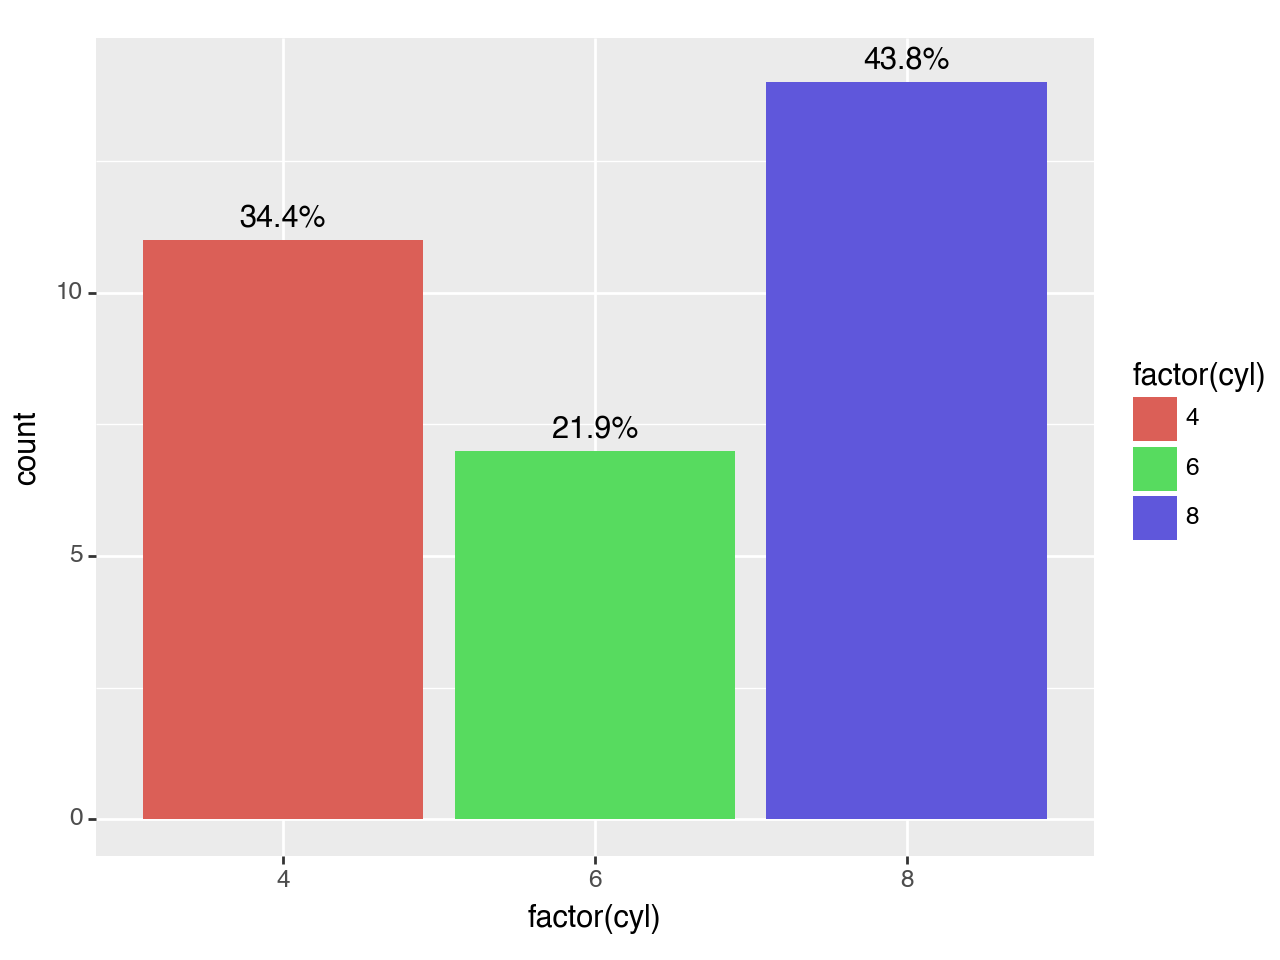

<Figure Size: (640 x 480)>

In [4]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
)

Without `group=1`, you can calculate the proportion / percentage after statistics have been calculated. This works because mapping expressions are evaluated across the whole panel. It can work when you have more than 1 categorical.

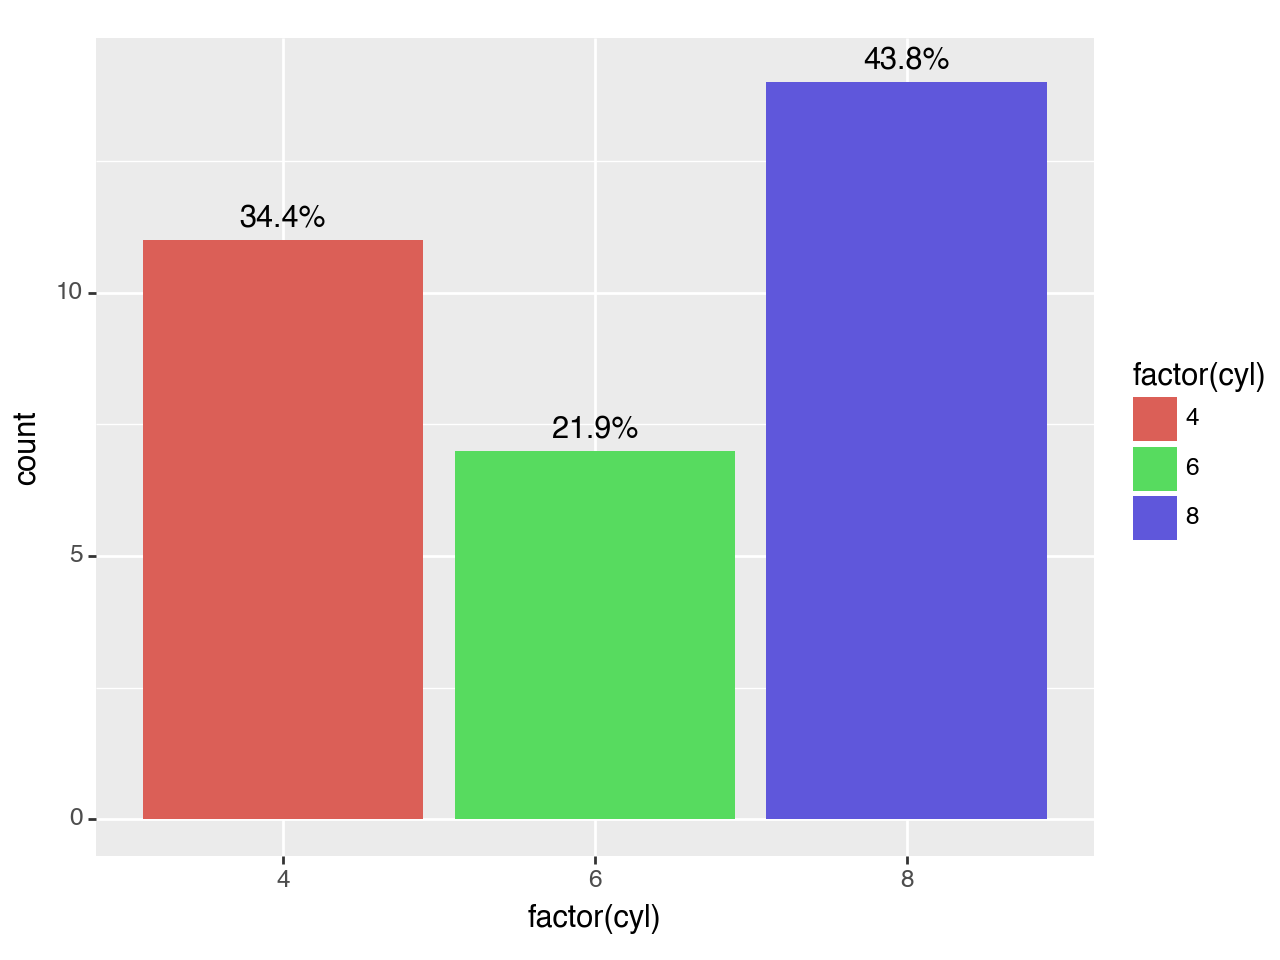

<Figure Size: (640 x 480)>

In [5]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('count / sum(count) * 100')),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
)

For more on why automatic grouping may work the way you want, see this [tutorial](./miscellaneous-automatic-grouping-insufficient.ipynb).

We can get the `counts` and we can get the `percentages` we need to print both. We can do that in two ways,

1. Using two `geom_text` layers.

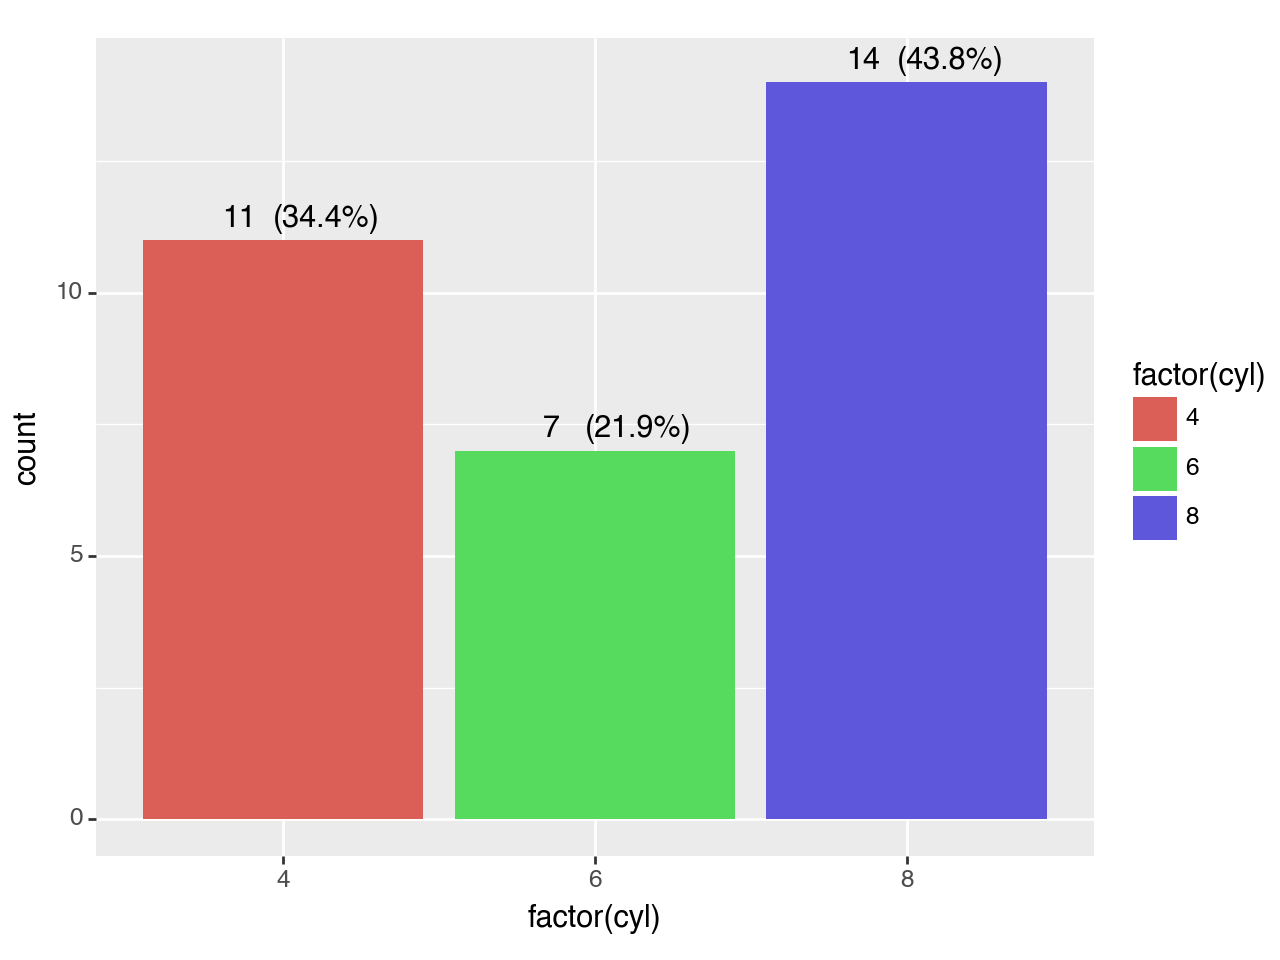

<Figure Size: (640 x 480)>

In [6]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('count')),
     stat='count',
     nudge_x=-0.14,
     nudge_y=0.125,
     va='bottom'
 )
 + geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_x=0.14,
     nudge_y=0.125,
     va='bottom',
     format_string='({:.1f}%)'
 )
)

2. Using a function to combine the counts and percentages

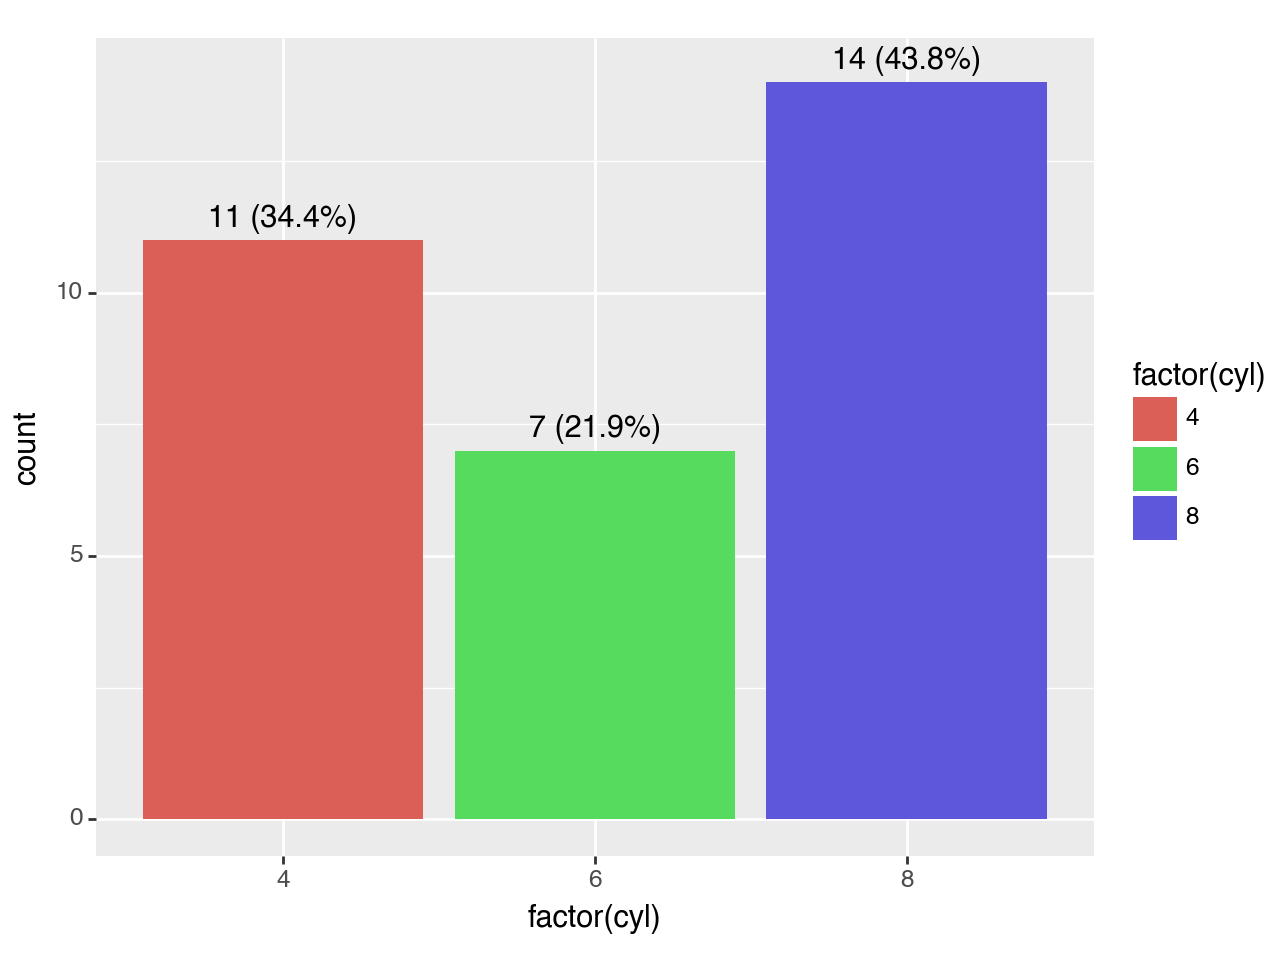

<Figure Size: (640 x 480)>

In [7]:
def combine(counts, percentages):
    fmt = '{} ({:.1f}%)'.format
    return [fmt(c, p) for c, p in zip(counts, percentages)]


(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('combine(count, prop*100)'), group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
)

It works with facetting.

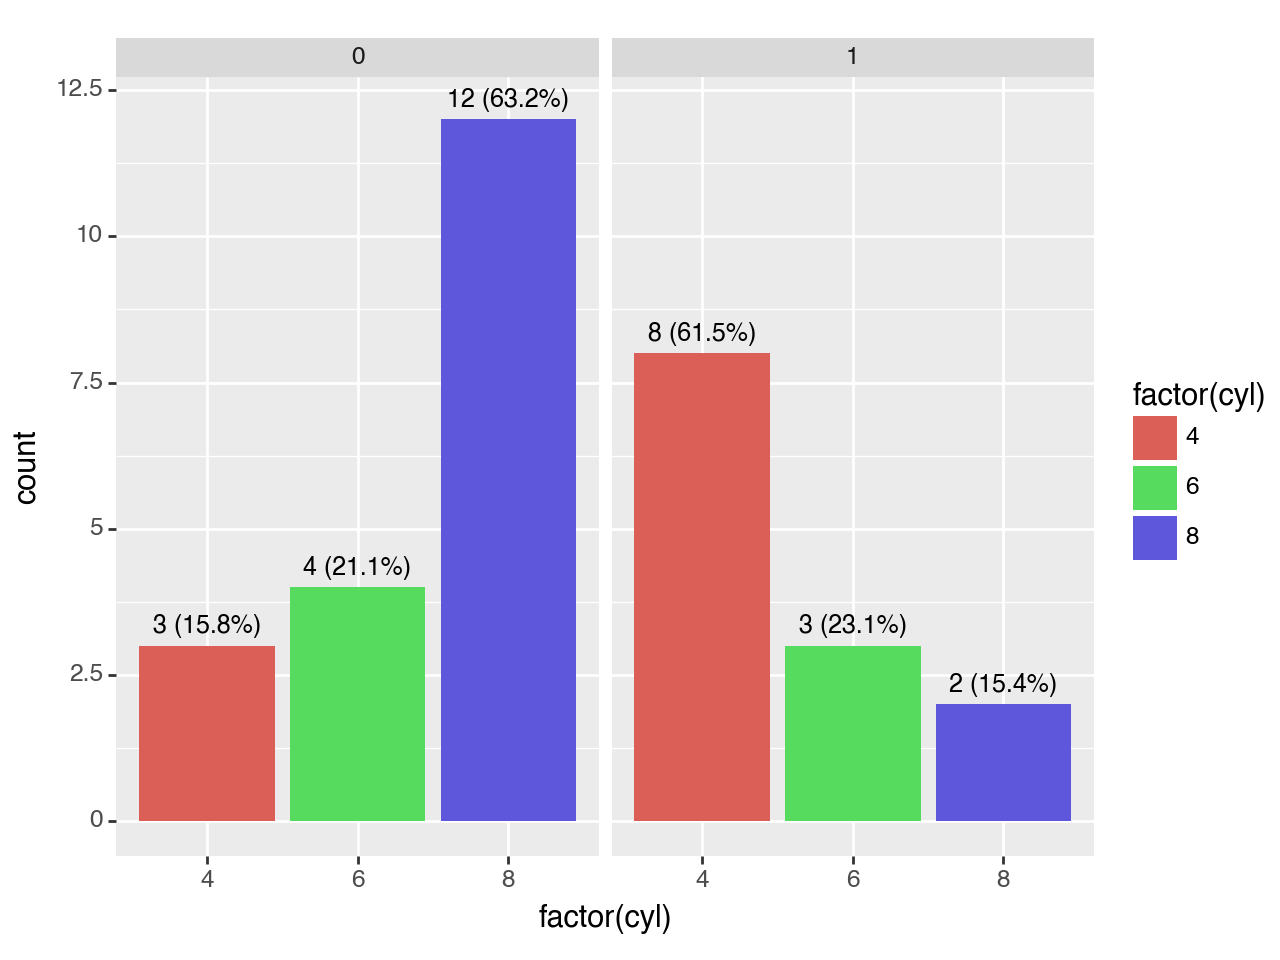

<Figure Size: (640 x 480)>

In [8]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(cyl)'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('combine(count, prop*100)'), group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     size=9
 )
 + facet_wrap('am')
)

**Credit:** This example was motivated by the github user [Fandekasp](https://github.com/Fandekasp) (Adrien Lemaire) and difficulty he faced in displaying percentages of bar plots.

### Percentages when you have more than one categorical.

`group = 1` does not work when you have more than one categories per `x` location. 

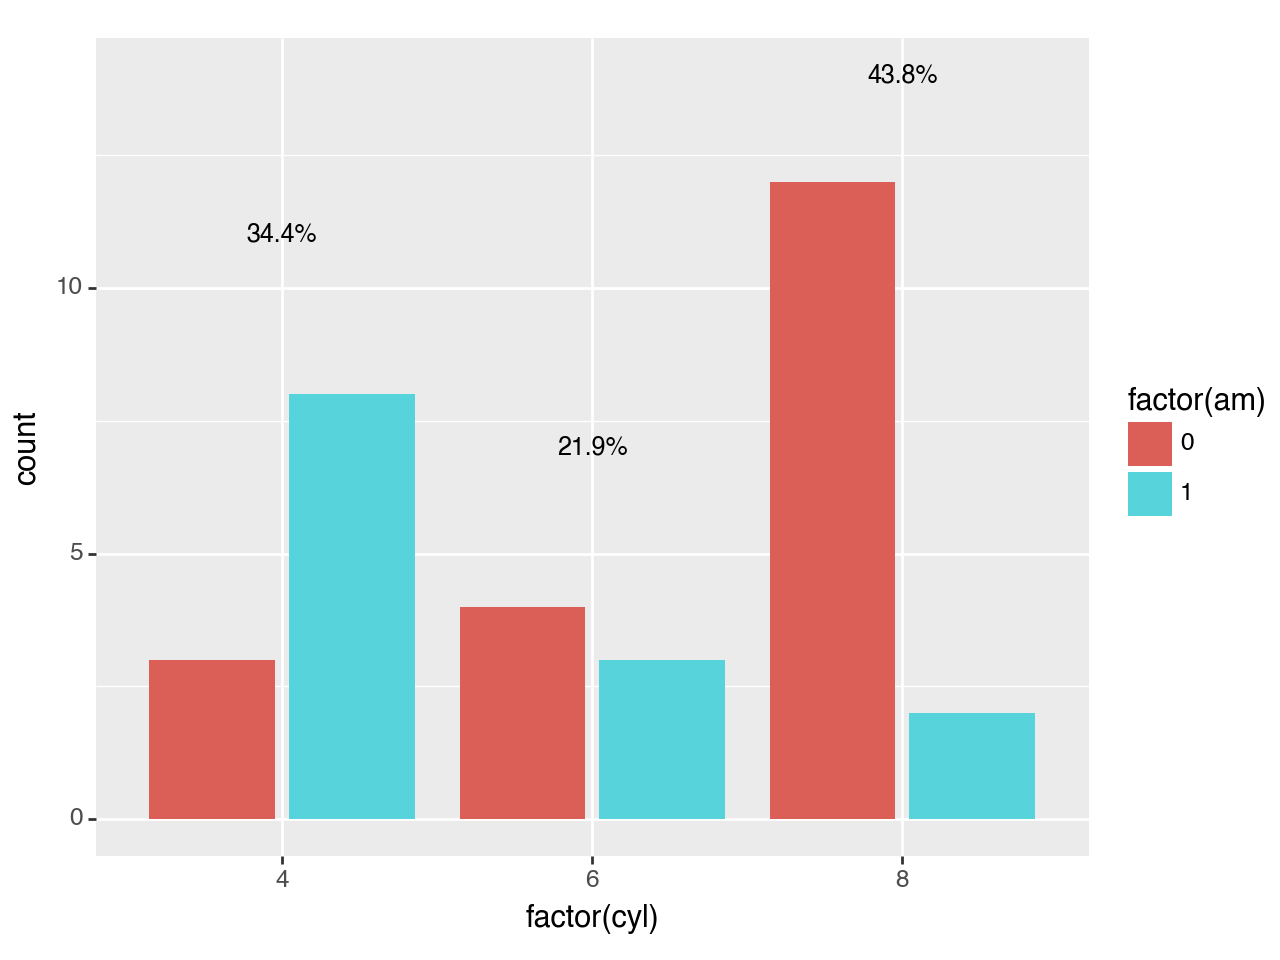

<Figure Size: (640 x 480)>

In [9]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(am)'))
 + geom_bar(position='dodge2')
 + geom_text(
     aes(
         label=after_stat('prop * 100'),
         group=1
     ),
     stat='count',
     position=position_dodge2(width=0.9),
     format_string='{:.1f}%',
     size=9,
 )
)

You have to calculate the percentages after statistics for the panel have been calculated.

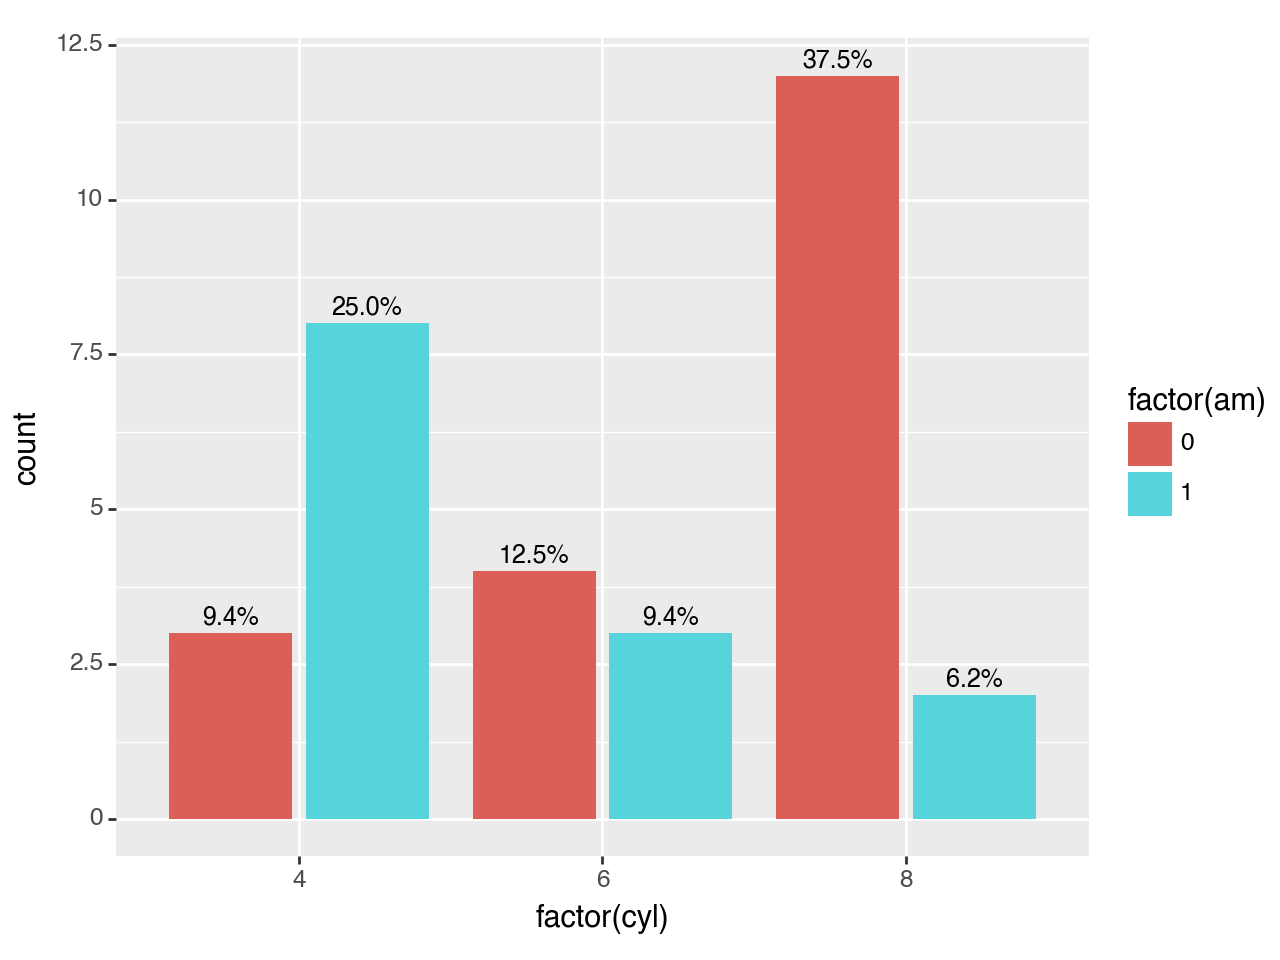

<Figure Size: (640 x 480)>

In [10]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(am)'))
 + geom_bar(position='dodge2')
 + geom_text(
     aes(
         label=after_stat('count / sum(count) * 100'),
         y=stage(after_stat='count', after_scale='y + 0.25'),
     ),
     stat='count',
     position=position_dodge2(width=0.9),
     format_string='{:.1f}%',
     size=9,
 )
)

For percentages per bar at each `x` location, you have to group the counts per location can compute the proportions.

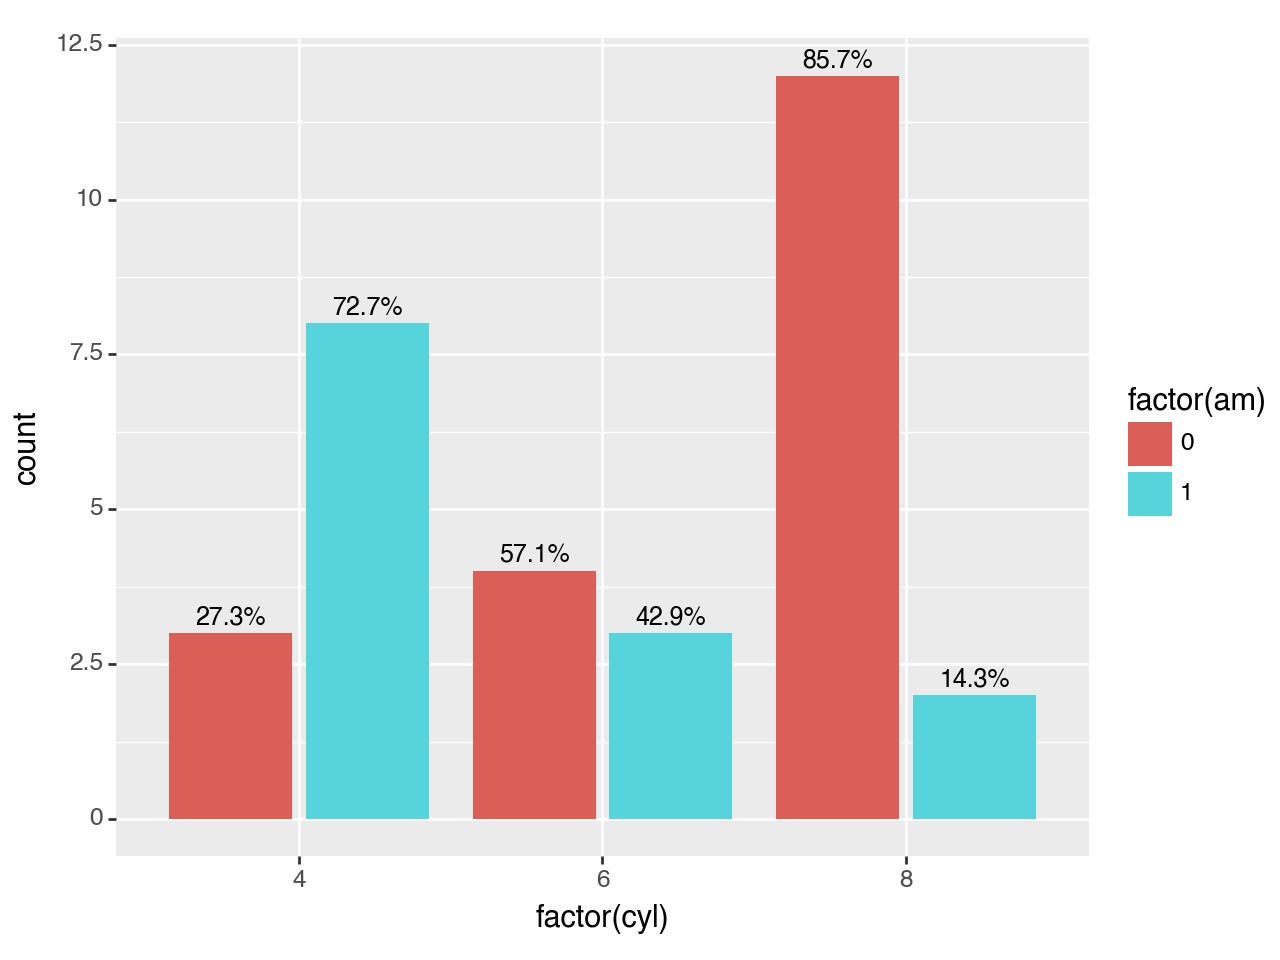

<Figure Size: (640 x 480)>

In [11]:
def prop_per_x(x, count):
    """
    Compute the proportion of the counts for each value of x
    """
    df = pd.DataFrame({
        'x': x,
        'count': count
    })
    prop = df['count']/df.groupby('x')['count'].transform('sum')
    return prop

(ggplot(mtcars, aes('factor(cyl)', fill='factor(am)'))
 + geom_bar(position='dodge2')
 + geom_text(
     aes(
         label=after_stat('prop_per_x(x, count) * 100'),
         y=stage(after_stat='count', after_scale='y+.25')
     ),
     stat='count',
     position=position_dodge2(width=0.9),
     format_string='{:.1f}%',
     size=9,
 )
)

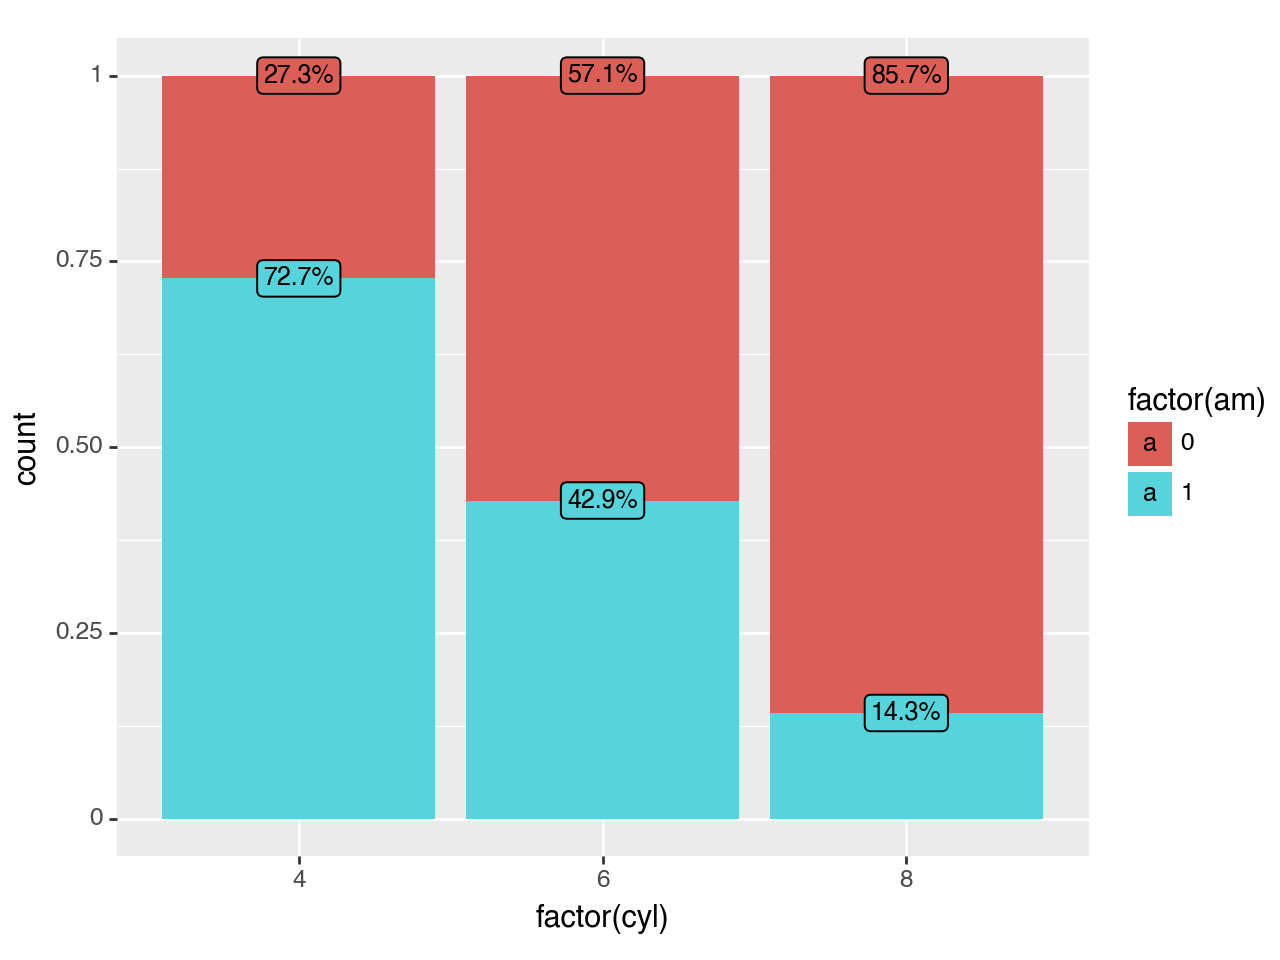

<Figure Size: (640 x 480)>

In [12]:
(ggplot(mtcars, aes('factor(cyl)', fill='factor(am)'))
 + geom_bar(position='fill')
 + geom_label(
     aes(label=after_stat('prop_per_x(x, count) * 100')),
     stat='count',
     position='fill',
     format_string='{:.1f}%',
     size=9,
 )
)

**NOTE**

With more categories, if it becomes harder get the right groupings withing plotnine, the solution is to do all (or most) the data manipulation in pandas then plot using `geom_col + geom_text`.